In [2]:
import numpy as np 
import pandas as pd 
import re 


In [3]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df=pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [5]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,not available,2.0,East,10+ Year Old,"['Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Taneja Hospital', 'Dr. Madan Clinic', 'Pearl Dental Clinic', 'Swastik Maternity and Medical Centre', 'Dev Man Kathuria Clinic', 'Ravi Clinic and Health Care Centre', 'Aryan Hospital', 'Bindal Clinic', 'M.S Hospital', 'My Care Clinic', 'D.R. Rajnis Gupta Clinic', 'Satyam Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Dr. Ashok Jain', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Shiv Mahima Patient Care Bureau', 'Shri Gobind Hospital', 'Gurgaon Eye Centre', 'Dr. Ajay S. Gupta Clinic', 'Lal Superspeciality Hospital', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Navjeevan Hospital and Maternity Centre', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lalit Dental Care', 'Lall Nursing and Maternity Home', 'Tirath Ram Hospitals Pvt Ltd', 'Ankur Clinic and Maternity Home', 'M Goel Hospital', 'Shubham Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Sethi Hospital Gurgaon', 'Nova Care Clinic', 'Dental Health Centre', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Pasricha Hospital and Maternity Home', 'Sharma Hospital Gurgaon', 'State bank of india', 'Hdfc bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']",[],['Park']


### Features on which our focus are :  areaWithType,additionalRoom,agePossession,furnishDetails,features

In [6]:
df[['area','areaWithType']].sample(5)

,area,areaWithType
847,2492.0,Super Built up area 2215(205.78 sq.m.)
230,2061.0,Super Built up area 1930(179.3 sq.m.)
3498,1465.0,Super Built up area 1465(136.1 sq.m.)Built Up area: 1175.97 sq.ft. (109.25 sq.m.)Carpet area: 834.96 sq.ft. (77.57 sq.m.)
3008,1760.0,Super Built up area 1760(163.51 sq.m.)Built Up area: 1186 sq.ft. (110.18 sq.m.)Carpet area: 1130 sq.ft. (104.98 sq.m.)
2639,1935.0,Super Built up area 1935(179.77 sq.m.)


In [7]:
# This function extracts the super built up  area 

def get_super_built_up_area(text):
    match=re.search(r'Super Built up area (\d+\.?\d*)',text)
    if(match):
        return float(match.group(1))
    return None

In [8]:
# This function extracts the built up area or  carpet area 
def get_area(text,area_type):
    match=re.search(area_type+r'\s*:\s*(\d+\.?\d*)',text)
    if match: 
        return float(match.group(1))
    return None

In [9]:
def convert_to_sqft(text,area_value):
    if area_value is None:
        return None
    match=re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
    if match:
        sqm_value=float(match.group(1))
        return sqm_value* 10.7639  
    return area_value

In [10]:
df['super_built_up_area']=df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area']=df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['super_built_up_area']),axis=1)

df['built_up_area']=df['areaWithType'].apply(lambda x:get_area(x,'Built Up area'))
df['built_up_area']=df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['built_up_area']),axis=1)
df['carpet_area']=df['areaWithType'].apply(lambda x:get_area(x,'Carpet area'))
df['carpet_area']=df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['carpet_area']),axis=1)


In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2909,1.20,flat,958.0,Carpet area: 958 (89 sq.m.),NaN,NaN,958.0
2402,0.74,flat,1360.0,Super Built up area 1360(126.35 sq.m.),1360.0,NaN,NaN
713,1.20,flat,1735.0,Super Built up area 1735(161.19 sq.m.)Built Up area: 1635 sq.ft. (151.9 sq.m.)Carpet area: 1535 sq.ft. (142.61 sq.m.),1735.0,1635.0,1535.0
636,1.10,flat,2057.0,Carpet area: 2057 (191.1 sq.m.),NaN,NaN,2057.0
2799,1.51,flat,1914.0,Super Built up area 1920(178.37 sq.m.),1920.0,NaN,NaN


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['carpet_area'].isnull()) | (df['built_up_area'].isnull())  )][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(682, 7)

In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df=df[((df['super_built_up_area'].isnull())&(df['carpet_area'].isnull())&(df['built_up_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']] 
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.89,house,477.0,Plot area 477(44.31 sq.m.),NaN,NaN,NaN
1,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
4,1.44,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
5,0.65,house,70.0,Plot area 70(6.5 sq.m.),NaN,NaN,NaN
13,4.25,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
27,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,NaN,NaN
50,13.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,NaN,NaN
53,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,NaN,NaN
57,15.10,house,8116.0,Plot area 754,NaN,NaN,NaN
62,1.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN


In [17]:
all_nan_index=df[((df['super_built_up_area'].isnull())&(df['carpet_area'].isnull())&(df['built_up_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index
all_nan_index

Int64Index([   0,    1,    4,    5,   13,   27,   50,   53,   57,   62,
            ...
            3672, 3689, 3693, 3694, 3705, 3731, 3741, 3749, 3761, 3788],
           dtype='int64', length=546)

In [18]:
# function to extract the plot area from 'areaWithType' column 
def extract_plot_area(area_with_type):
    match=re.search(r'Plot area (\d+\.?\d*)',area_with_type)
    return float(match.group(1)) if match else None


In [19]:
all_nan_df['built_up_area']=all_nan_df['areaWithType'].apply(extract_plot_area)

# update the original dataframe:
# gurgaon_properties.update(filtered_rows)

In [20]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.89,house,477.0,Plot area 477(44.31 sq.m.),NaN,477.00,NaN
1,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
4,1.44,house,540.0,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
5,0.65,house,70.0,Plot area 70(6.5 sq.m.),NaN,70.00,NaN
13,4.25,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN
27,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.00,NaN
50,13.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,402.00,NaN
53,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,172.00,NaN
57,15.10,house,8116.0,Plot area 754,NaN,754.00,NaN
62,1.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [21]:
def convert_scale(row):
    if(np.isnan(row['area']) or np.isnan(row['built_up_area'])):
        return row['built_up_area']
    else :
        if round(row['area']/row['built_up_area'])==9.0:
            return row['built_up_area']*9
        elif round(row['area']/row['built_up_area'])==11.0:
            return row['built_up_area']*10.7
        else:
            return row['built_up_area']
            

In [22]:
all_nan_df['built_up_area']=all_nan_df.apply(convert_scale,axis=1)

In [23]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.89,house,477.0,Plot area 477(44.31 sq.m.),NaN,477.00,NaN
1,5.00,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
4,1.44,house,540.0,Plot area 60(50.17 sq.m.),NaN,540.00,NaN
5,0.65,house,70.0,Plot area 70(6.5 sq.m.),NaN,70.00,NaN
13,4.25,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN
27,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.00,NaN
50,13.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,3618.00,NaN
53,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,1548.00,NaN
57,15.10,house,8116.0,Plot area 754,NaN,8067.80,NaN
62,1.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN


In [24]:
df.update(all_nan_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [26]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,not available,2.0,East,10+ Year Old,"['Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Taneja Hospital', 'Dr. Madan Clinic', 'Pearl Dental Clinic', 'Swastik Maternity and Medical Centre', 'Dev Man Kathuria Clinic', 'Ravi Clinic and Health Care Centre', 'Aryan Hospital', 'Bindal Clinic', 'M.S Hospital', 'My Care Clinic', 'D.R. Rajnis Gupta Clinic', 'Satyam Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Dr. Ashok Jain', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Shiv Mahima Patient Care Bureau', 'Shri Gobind Hospital', 'Gurgaon Eye Centre', 'Dr. Ajay S. Gupta Clinic', 'Lal Superspeciality Hospital', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Navjeevan Hospital and Maternity Centre', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lalit Dental Care', 'Lall Nursing and Maternity Home', 'Tirath Ram Hospitals Pvt Ltd', 'Ankur Clinic and Maternity Home', 'M Goel Hospital', 'Shubham Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Sethi Hospital Gurgaon', 'Nova Care Clinic', 'Dental Health Centre', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Pasricha Hospital and Maternity Home', 'Sharma Hospital Gurgaon', 'State bank of india', 'Hdfc bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']",[],['Park'],NaN,477.0,NaN
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3,3,3,not available,1.0,South,5 to 10 Year Old,"['Sheetla Mata Mandir', 'Hsbc bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Punjab national bank ATM', 'Citi bank ATM', 'Nagpal Nursing Home Gurgaon', 'Apollo Cradle Hospital Gurgaon', 'Kishor Clinic', 'Kalyani Hospital Gurgaon', 'Sheetla Clinic', 'Sangwan Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Dr. Babita Sharma', 'Children Hospital', 'Nidhi Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Dr. Tomar Clinic', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Sector-14 Market', 'Indian Oil', 'Standard chartered bank', 'Icici bank', 'Hdfc bank', 'Oriental bank of commerce', 'Karur vysay bank', 'Catholic syrian bank', 'State bank of india sbi', 'Rang Parivartan', 'Cafe Coffee Day', 'Dhabba', '32nd Milestone', 'Cafe Coffee Day', 'Ardor 29', 'ADDA', 'Gung the palace Korean restaurant', 'Walking Street', 'Swagath', 'Tocpao', 'Spaghetti Kitchen & Bar', 'distillery', 'Pizza Hut', ""Hops 'N' Brew"", 'KFC', ""Domino's Pizza"", ""McDonald's"", 'Salvan Public School', 'Management Development Institute', 'Lieutenant Atul Kataria School']",NaN,"['Private Garden / Terrace', 'No open drainage around', 'Natural Light', 'Airy Rooms']",NaN,2250.0,NaN
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2350 sq.ft. (218.32 sq.m.)Carpet area: 2170 sq.ft. (201.6 sq.m.),3,4,3+,servant room,5.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 Water Purifier', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Ligh

## 2  additionalRoom

In [27]:
df['additionalRoom'].value_counts() 

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [28]:
# addtional columns 
# list of new columns to be created 
new_cols=['servant room','study room','pooja room','store room','others']

# populate the  new columns based on  the additionalRoom column

for cols in new_cols:
    df[cols]=df['additionalRoom'].str.contains(cols).astype(int)

In [29]:
df.sample(5)[ ['additionalRoom','servant room','study room','pooja room','store room','others'] ]

,additionalRoom,servant room,study room,pooja room,store room,others
3426,not available,0,0,0,0,0
177,others,0,0,0,0,1
1492,not available,0,0,0,0,0
871,others,0,0,0,0,1
1435,servant room,1,0,0,0,0


In [30]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,not available,2.0,East,10+ Year Old,"['Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Taneja Hospital', 'Dr. Madan Clinic', 'Pearl Dental Clinic', 'Swastik Maternity and Medical Centre', 'Dev Man Kathuria Clinic', 'Ravi Clinic and Health Care Centre', 'Aryan Hospital', 'Bindal Clinic', 'M.S Hospital', 'My Care Clinic', 'D.R. Rajnis Gupta Clinic', 'Satyam Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Dr. Ashok Jain', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Shiv Mahima Patient Care Bureau', 'Shri Gobind Hospital', 'Gurgaon Eye Centre', 'Dr. Ajay S. Gupta Clinic', 'Lal Superspeciality Hospital', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Navjeevan Hospital and Maternity Centre', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lalit Dental Care', 'Lall Nursing and Maternity Home', 'Tirath Ram Hospitals Pvt Ltd', 'Ankur Clinic and Maternity Home', 'M Goel Hospital', 'Shubham Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Sethi Hospital Gurgaon', 'Nova Care Clinic', 'Dental Health Centre', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Pasricha Hospital and Maternity Home', 'Sharma Hospital Gurgaon', 'State bank of india', 'Hdfc bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']",[],['Park'],NaN,477.0,NaN,0,0,0,0,0
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3,3,3,not available,1.0,South,5 to 10 Year Old,"['Sheetla Mata Mandir', 'Hsbc bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Punjab national bank ATM', 'Citi bank ATM', 'Nagpal Nursing Home Gurgaon', 'Apollo Cradle Hospital Gurgaon', 'Kishor Clinic', 'Kalyani Hospital Gurgaon', 'Sheetla Clinic', 'Sangwan Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Dr. Babita Sharma', 'Children Hospital', 'Nidhi Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Dr. Tomar Clinic', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Sector-14 Market', 'Indian Oil', 'Standard chartered bank', 'Icici bank', 'Hdfc bank', 'Oriental bank of commerce', 'Karur vysay bank', 'Catholic syrian bank', 'State bank of india sbi', 'Rang Parivartan', 'Cafe Coffee Day', 'Dhabba', '32nd Milestone', 'Cafe Coffee Day', 'Ardor 29', 'ADDA', 'Gung the palace Korean restaurant', 'Walking Street', 'Swagath', 'Tocpao', 'Spaghetti Kitchen & Bar', 'distillery', 'Pizza Hut', ""Hops 'N' Brew"", 'KFC', ""Domino's Pizza"", ""McDonald's"", 'Salvan Public School', 'Management Development Institute', 'Lieutenant Atul Kataria School']",NaN,"['Private Garden / Terrace', 'No open drainage around', 'Natural Light', 'Airy Rooms']",NaN,2250.0,NaN,0,0,0,0,0
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2350 sq.ft. (218.32 sq.m.)Carpet area: 2170 sq.ft. (201.6 sq.m.),3,4,3+,servant room,5.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 Water Purifier', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', '

### 3 agePossession

In [31]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Jun 2024                 7
Aug 2023                 7
Nov 2023                 5
Jul 2024                 4
Aug 2024                 4
Oct 2023                 4
By 2025                  4
Sep 2023                 4
Jan 2025                 3
Nov 2024                 3
Feb 2024                 3
May 2024                 3
Jan 2026                 2
Dec 2026                 2
Jul 2027                 2
Oct 2025                 2
By 2027                  2
Jun 2027                 2
Mar 2025                 2
Aug 2025                 2
Apr 2026                 2
S

In [32]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value or "2023" in value  :
          return "New Property"
    if "1 to 5 Year Old" in value:
         return "Relatively New"
    if "5 to 10 Year Old" in value:
         return "Moderately Old"
    if "10+ Year Old" in value:
         return "Old Property"
    if "Under Construction" in value or "By" in value:
         return "Under Construction"
    try:
     #     for entries like 'May 2024'
         int(value.split(" ")[-1])
         return "Under Construction"
    except:
         return "Undefined"
         

In [33]:
df['agePossession']=df['agePossession'].apply(categorize_age_possession)

In [34]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           687
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     222
Name: agePossession, dtype: int64

In [35]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,not available,2.0,East,Old Property,"['Geeta Nursing Home Gurgaon', 'Chiranjiv Hospital', 'Taneja Hospital', 'Dr. Madan Clinic', 'Pearl Dental Clinic', 'Swastik Maternity and Medical Centre', 'Dev Man Kathuria Clinic', 'Ravi Clinic and Health Care Centre', 'Aryan Hospital', 'Bindal Clinic', 'M.S Hospital', 'My Care Clinic', 'D.R. Rajnis Gupta Clinic', 'Satyam Hospital Gurgaon', 'Triveni Hospital Gurgaon', 'Dr. Ashok Jain', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Shiv Mahima Patient Care Bureau', 'Shri Gobind Hospital', 'Gurgaon Eye Centre', 'Dr. Ajay S. Gupta Clinic', 'Lal Superspeciality Hospital', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Kharbanda Maternity and Nursing Home', 'Gupta Hospital Gurgaon', 'Navjeevan Hospital and Maternity Centre', 'Dentecare - Multispeciality Dental Clinic', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lalit Dental Care', 'Lall Nursing and Maternity Home', 'Tirath Ram Hospitals Pvt Ltd', 'Ankur Clinic and Maternity Home', 'M Goel Hospital', 'Shubham Hospital Gurgaon', 'Verma E.N.T. Hospital', 'Sethi Hospital Gurgaon', 'Nova Care Clinic', 'Dental Health Centre', 'Rajiv Memorial Eye Infirmary Jacobpura', 'Pasricha Hospital and Maternity Home', 'Sharma Hospital Gurgaon', 'State bank of india', 'Hdfc bank', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']",[],['Park'],NaN,477.0,NaN,0,0,0,0,0
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3,3,3,not available,1.0,South,Moderately Old,"['Sheetla Mata Mandir', 'Hsbc bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Punjab national bank ATM', 'Citi bank ATM', 'Nagpal Nursing Home Gurgaon', 'Apollo Cradle Hospital Gurgaon', 'Kishor Clinic', 'Kalyani Hospital Gurgaon', 'Sheetla Clinic', 'Sangwan Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Dr. Babita Sharma', 'Children Hospital', 'Nidhi Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Dr. Tomar Clinic', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Sector-14 Market', 'Indian Oil', 'Standard chartered bank', 'Icici bank', 'Hdfc bank', 'Oriental bank of commerce', 'Karur vysay bank', 'Catholic syrian bank', 'State bank of india sbi', 'Rang Parivartan', 'Cafe Coffee Day', 'Dhabba', '32nd Milestone', 'Cafe Coffee Day', 'Ardor 29', 'ADDA', 'Gung the palace Korean restaurant', 'Walking Street', 'Swagath', 'Tocpao', 'Spaghetti Kitchen & Bar', 'distillery', 'Pizza Hut', ""Hops 'N' Brew"", 'KFC', ""Domino's Pizza"", ""McDonald's"", 'Salvan Public School', 'Management Development Institute', 'Lieutenant Atul Kataria School']",NaN,"['Private Garden / Terrace', 'No open drainage around', 'Natural Light', 'Airy Rooms']",NaN,2250.0,NaN,0,0,0,0,0
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up area: 2350 sq.ft. (218.32 sq.m.)Carpet area: 2170 sq.ft. (201.6 sq.m.),3,4,3+,servant room,5.0,North-East,Relatively New,"['Dwarka Sector 21', 'Pacific D21 Mall', 'Bajghera Road', 'Dwarka Expy', 'Euro International School, Sector- 109.', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi Intl Airport', 'Bijwasan Railway Station']","['1 Water Purifier', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lif

### 4 furnishDetails

In [36]:
df['furnishDetails'].value_counts()

[]                                                                                                                                                                                                                                                                       421
['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']     199
['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']      72
['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa'

In [37]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1608,NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
989,NaN,"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
223,"['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3425,NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3191,"['3 Wardrobe', '4 Fan', '7 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center', 'Water softening plant']"


In [38]:
# Etract all the unique furnishing from the furnishDetails column

all_furnishings=[]
for details in df['furnishDetails'].dropna():
    furnishings=details.replace('[','').replace(']','').replace("'",'').split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings=list(set(all_furnishings))
 

# # define a function to extract the count of a furnishings from the furnishingDtails:

def get_furnishing_count(details,furnishings):
    if isinstance(details,str):
        if f"No {furnishings}" in details:
            return 0;
        pattern=re.compile(f"(\d+) {furnishings}")
        match=pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishings in details:
            return 1
    return 0


# # # simplify the furnishing list by removing "No" prefix and numbers :
columns_to_include=[re.sub(r'No |\d+','',furnishings).strip() for furnishings in unique_furnishings] 

columns_to_include=list(set(columns_to_include)) #get unique furnishings 
columns_to_include =[furnishings for furnishings in columns_to_include if furnishings] #remove empty strings 
 

# # # create a new column for each unique furnishings and populate with counts 

for furnishings in columns_to_include:
    df[furnishings]=df['furnishDetails'].apply(lambda x: get_furnishing_count(x,furnishings))

# # # create a new df  with the required columns 
    
furnishings_df=df[['furnishDetails']+columns_to_include] 

furnishings_df.sample(4)


,furnishDetails,Bed,Exhaust Fan,Sofa,Geyser,Washing Machine,Dining Table,Modular Kitchen,Fan,Light,Microwave,Stove,Wardrobe,Chimney,AC,Curtains,Fridge,TV,Water Purifier
2307,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1781,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1764,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2743,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0


In [39]:
furnishings_df.columns

Index(['furnishDetails', 'Bed', 'Exhaust Fan', 'Sofa', 'Geyser',
       'Washing Machine', 'Dining Table', 'Modular Kitchen', 'Fan', 'Light',
       'Microwave', 'Stove', 'Wardrobe', 'Chimney', 'AC', 'Curtains', 'Fridge',
       'TV', 'Water Purifier'],
      dtype='object')

In [40]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\sk531\AppData\Local\Temp\ipykernel_33876\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [41]:
furnishings_df.columns

Index(['Bed', 'Exhaust Fan', 'Sofa', 'Geyser', 'Washing Machine',
       'Dining Table', 'Modular Kitchen', 'Fan', 'Light', 'Microwave', 'Stove',
       'Wardrobe', 'Chimney', 'AC', 'Curtains', 'Fridge', 'TV',
       'Water Purifier'],
      dtype='object')

In [42]:
furnishings_df.head()

,Bed,Exhaust Fan,Sofa,Geyser,Washing Machine,Dining Table,Modular Kitchen,Fan,Light,Microwave,Stove,Wardrobe,Chimney,AC,Curtains,Fridge,TV,Water Purifier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,12,0,0,1,12,75,4,1,12,4,12,12,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Now we will do the classification 

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [44]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(furnishings_df)

In [45]:
wcss_reduced=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\clust

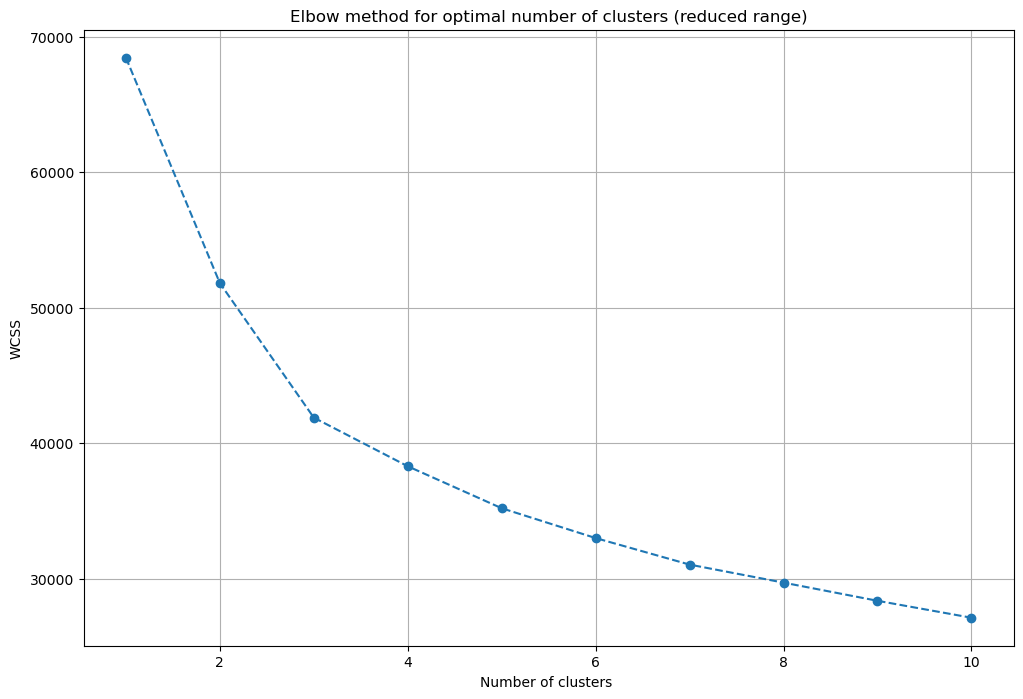

In [46]:
# plotting the results to get the elbow point for optimal number of clusters 
# The "elbow" point, where the rate of decrease in WCSS starts to slow down, indicates the optimal number of clusters
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss_reduced,marker='o',linestyle='--')
plt.title("Elbow method for optimal number of clusters (reduced range)")
plt.xlabel('Number of clusters ')
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [47]:
n_clusters=3
# slopes reduction rate is low @ 3 so 3 clusters are optimal 

# fit the KMeans model 
kmeans=KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(scaled_data)


# predict the cluster assignment for eachr row 

cluster_assignments=kmeans.predict(scaled_data)


c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
df.iloc[:,:-18].columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'servant room', 'study room', 'pooja room', 'store room',
       'others'],
      dtype='object')

In [49]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'servant room', 'study room', 'pooja room', 'store room',
       'others', 'Bed', 'Exhaust Fan', 'Sofa', 'Geyser', 'Washing Machine',
       'Dining Table', 'Modular Kitchen', 'Fan', 'Light', 'Microwave', 'Stove',
       'Wardrobe', 'Chimney', 'AC', 'Curtains', 'Fridge', 'TV',
       'Water Purifier'],
      dtype='object')

In [50]:
# removing the last 18 columns 

df=df.iloc[:,:-18]



In [51]:
df['furnishing_type']=cluster_assignments

In [52]:
df.sample(5)[['furnishing_type','furnishDetails']]

# 0 unfurnished
# 1 semi-furnished 
# 2 furnishied 

,furnishing_type,furnishDetails
741,0,[]
2531,0,"['4 Wardrobe', '5 Fan', '3 Geyser', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"
2896,2,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '22 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"
174,2,"['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']"
3730,0,NaN


### 5 features 

In [53]:
df['features'].sample(5)

360                        ['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']
337                                                                                                                                                                                                                                                                                                                                      

In [54]:
df['features'].isnull().sum()

635

In [55]:
# now we will fill the missing features from the appartment dataset we have 

app_df=pd.read_csv("appartments.csv")
app_df.head(3)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"
2,Adani Brahma Samsara Vilasa,"Land, 3, 4 BHK Independent Floor in Sector 63, Gurgaon","['AIPL Business Club Sector 62', 'Heritage Xperiential Learning School', 'CK Birla Hospital', 'Paras Trinity Mall Sector 63', 'Rapid Metro Station Sector 56']","{'AIPL Business Club Sector 62': '2.7 Km', 'Heritage Xperiential Learning School': '2 Km', 'CK Birla Hospital': '2.5 Km', 'Paras Trinity Mall Sector 63': '3.5 Km', 'Rapid Metro Station Sector 56': '3.8 Km', 'De Adventure Park': '6.8 Km', 'Golf Course Ext Rd': '99 Meter', 'DoubleTree by Hilton Hotel Gurgaon': '3.6 Km', 'KIIT College of Engineering Sohna Road': '8.4 Km', 'Mehrauli-Gurgaon Road': '11.8 Km', 'Indira Gandhi International Airport': '21.1 Km', 'Nirvana Rd': '160 Meter', 'TERI Golf Course': '8.7 Km'}",https://www.99acres.com/adani-brahma-samsara-vilasa-sector-63-gurgaon-npxid-r327995,"{'3 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '1,800 - 3,150 sq.ft.', 'price-range': '₹ 2.43 - 15.75 Cr'}, '4 BHK': {'building_type': 'Independent Floor', 'area_type': 'Super Built-up Area', 'area': '2,750 - 4,500 sq.ft.', 'price-range': '₹ 3.36 - 22.5 Cr'}, 'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '500 - 4,329 sq.ft.', 'price-range': '₹ 2.05 - 41.13 Cr'}}","['Terrace Garden', 'Gazebo', 'Fountain', 'Amphitheatre', 'Party Lawn', 'Basketball Court', 'Badminton Court', 'Yoga/Meditation Area', 'Indoor Games']"


In [56]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'floorNum', 'facing', 'agePossession', 'nearbyLocations',
       'furnishDetails', 'features', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'servant room', 'study room', 'pooja room', 'store room',
       'others', 'furnishing_type'],
      dtype='object')

In [57]:
print(app_df['PropertyName'].str.lower().sample(4))

47               dlf alameda
27     signature global city
163      adani tatva estates
12         m3m antalya hills
Name: PropertyName, dtype: object


In [58]:
app_df['PropertyName']=app_df['PropertyName'].str.lower()

In [59]:
temp_df=df[df['features'].isnull()] 

In [60]:
temp_df.shape

(635, 26)

In [61]:
x=temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']


In [62]:
df.loc[temp_df.index,'features']=x.values


In [63]:
df['features'].isnull().sum()

481

In [64]:
# Now the main task starts 
# first approach is to try clustering check if it works or not 

from sklearn.preprocessing import MultiLabelBinarizer
import ast 

In [65]:
# converting the string representation of list in the features column with

df['features_list']=df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])
df['features_list'].sample(4)

416     [Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]
1644                                                                                                                                                                                                                                                                                                                                                                      

In [66]:
# using MultiLabelBinarizer to convert features_list into a binary matrix 
mlb=MultiLabelBinarizer()
features_binary_matrix=mlb.fit_transform(df['features_list'])
 
# convert the binary matrix to data frame : 
features_binary_df=pd.DataFrame(features_binary_matrix,columns=mlb.classes_)
features_binary_df.head(5)
features_binary_df.columns

Index(['24/7 Power Backup', '24/7 Water Supply', '24x7 Security', 'ATM',
       'Aerobics Centre', 'Air Hockey', 'Airy Rooms', 'Amphitheatre',
       'Automated Car Wash', 'Badminton Court',
       ...
       'Visitors Parking', 'Volley Ball Court', 'Waiting Lounge',
       'Waste Disposal', 'Water Softener Plant', 'Water Storage',
       'Water purifier', 'Water softening plant', 'Wi-Fi Connectivity',
       'Yoga/Meditation Area'],
      dtype='object', length=130)

In [67]:
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
wcss_reduced=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit_transform(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)


c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sk531\anaconda3\lib\site-packages\sklearn\clust

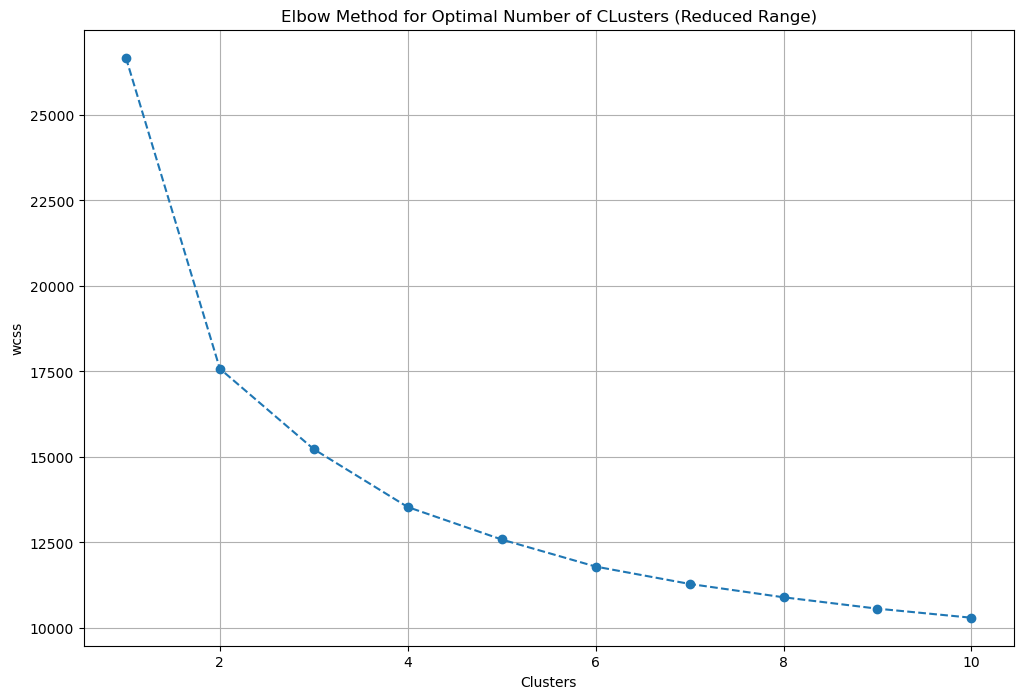

In [69]:
# plot the result and we see disperency as we get 2 clusters only and 1 contains all the features and other contains only nan value so try other way 

plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss_reduced,marker='o',linestyle='--')
plt.title("Elbow Method for Optimal Number of CLusters (Reduced Range)")
plt.xlabel('Clusters')
plt.ylabel("wcss")
plt.grid(True)
plt.show()

In [70]:
# n_clusters=2
 
# # fit the KMeans model 
# kmeans=KMeans(n_clusters=n_clusters,random_state=42)
# kmeans.fit(features_binary_df)

 
# cluster_assignments=kmeans.predict(features_binary_df)

# cluster_assignments 

# df['timepas']=cluster_assignments

# df.sample(10)[['timepas','features_list']]
# df.drop(columns=['timepas'],inplace=True)
# df.columns

In [77]:
# instead of creating a categorical column we will create a numerical column known as luxury score 

weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Automated Car Wash': 5,
    'Badminton Court': 7,
    'Bank Attached Property': 6,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Beach Volley Ball Court': 6,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Bus Shelter': 4,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Car wash area': 5,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Club house / Community Center': 8,
    'Community Hall': 7,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Gazebo': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lift(s)': 7,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'No open drainage around': 5,
    'Park': 8,
    'Party Lawn': 8,
    'Pergola': 7,
    'Piped Gas': 7,
    'Piped-gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Power Back-up': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Recently Renovated': 6,
    'Reflexology Park': 7,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'School': 6,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Terrace Garden': 8,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Vastu Compliant': 6,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Visitors Parking': 7,
    'Volley Ball Court': 7,
    'Waiting Lounge': 7,
    'Waste Disposal': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Wi-Fi Connectivity': 7,
    'Yoga/Meditation Area': 7
} 
  
# calculate luxury score for each row 
luxury_score=features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [78]:
df['luxury_score']=luxury_score

In [80]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,features_list,luxury_score
2673,flat,spire woods now ananda by alpha corp,sector 103,1.25,6902.0,1811.0,Carpet area: 1811 (168.25 sq.m.),3,4,3,"study room,servant room",11.0,NaN,Under Construction,"['State bank ATM', 'Dr. Hitesh Dawar', 'Bhardwaj Hospital', 'R K Hospital Gurgaon', 'Shree Krishna Hospital Gurgaon', 'Prateek Nursing Home And Polyclinic', 'Chirag Hospital Pvt. Ltd', 'Esic Hospital Gurugram', 'Kr Dental Hub', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'Pizza Hut', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station', 'Basai dhankot railway station']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",NaN,NaN,1811.0,1,1,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), Centrally Air Conditioned, Water purifier, Water Storage, Piped-gas, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center]",127
1056,flat,ramsons kshitij,sector 95,0.19,591.0,3215.0,Carpet area: 3212 (298.4 sq.m.),1,1,1,not available,14.0,East,Relatively New,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. Sarkar Clinic', 'Sagar Clinic', 'Vijay Petrol Pump']","['1 Wardrobe', '1 Fan', '1 Fridge', '1 Sofa', '1 Stove', '1 Light', '1 AC', '1 Curtains', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,3212.0,0,0,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",56
1779,house,independent,sector 50,11.58,35741.0,3240.0,Plot area 360(301.01 sq.m.),5,5,3,servant room,2.0,NaN,Moderately Old,"['Radhakrishna Shani Mandir', 'Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Skin Clinic', 'Best Urologist Atcomplete Family Clinic', 'Divine Look Clinic Centre', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Wembley estate club', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'SPAZE BUSINESS PARK', 'Unitech', 'India Oil', 'Hdfc bank', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'SRS Cinemas', 'Madison and Pike', 'India', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School', 'Manav Rachna School', 'St. Angels Sr', 'Manav Rachna Swimming Pool']",NaN,"['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal']",NaN,3240.0,NaN,1,0,0,0,0,0,"[Maintenance Staff, Water Storage, Visitor Parking, Waste Disposal]",27


In [91]:
# cols to drop :nearbyLocations,furnishDetails,features,features_list,additionalRoom


df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [92]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
2361,flat,mapsko royale ville,sector 82,1.12,6256.0,1790.0,Super Built up area 1790(166.3 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,2,12.0,North-East,Relatively New,1790.00,NaN,1400.0,0,0,1,0,0,2,56
1949,flat,sahara grace,sector 28,4.30,12420.0,3462.0,Super Built up area 3462.01(321.63 sq.m.),3,4,3,5.0,NaN,Old Property,3462.01,NaN,NaN,1,0,0,1,0,0,47
2589,house,vipul tatvam villa,sector 48,7.80,23148.0,3370.0,Plot area 360(301.01 sq.m.),4,4,3+,2.0,North-East,Relatively New,NaN,3240.0,NaN,1,1,1,1,0,2,178
3334,house,independent,sector 12,1.70,8000.0,2125.0,Built Up area: 2000 (185.81 sq.m.),5,5,3,3.0,NaN,Moderately Old,NaN,2000.0,NaN,0,0,1,0,1,0,9
1131,flat,godrej nature plus,sector 33,1.50,9677.0,1550.0,Super Built up area 1550(144 sq.m.),3,3,3,6.0,East,Under Construction,1550.00,NaN,NaN,0,1,0,0,0,0,87


In [95]:
df.shape

(3803, 23)

In [96]:
df.to_csv("gurgaon_properties_cleaned_v2.csv",index=False)